# 0. Описание задачи

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.

#### Описание датасета

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

#### Критерии оценки

1. Качество кода и соответствие стандартам оформления pep-8.
2. Для каждого столбца найдено количество пустых строк, найдены и убраны выбросы. 
3. Для количественных переменных построены гистограммы распределений и сделаны выводы.
4. Проведён корреляционный анализ и анализ номинативных переменных, корректно отобраны переменные для построения модели.
5. Сформулированы промежуточные и итоговые выводы.

<a id='0'></a>
## Содержание

1. [Импорт необходимых библиотек и создание функций.](#1)
2. [Первичный осмотр данных.](#2)
3. [Первичный общий анализ столбцов.](#3)
4. [Анализ отдельных столбцов.](#4)  
4.1. [Анализ столбцов с числовыми признаками](#4_1)  
4.2. [Анализ столбцов с категориальными небинарными признаками.](#4_2)  
4.3. [Анализ столбцов с категориальными бинарными признаками.](#4_3)
5. [Корреляционный анализ числовых данных.](#5)
6. [Анализ номинативных переменных.](#6)  
6.1. [Боксплоты.](#6_1)  
6.2. [Статистическая разница.](#6_2)  
7. [Определение столбцов, не влияющих на целевую переменную.](#7)
8. [Заполнение пропусков.](#8)
9. [Итоги.](#9)

<a id='1'></a>
# 1. Импорт необходимых библиотек и создание функций

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import scipy.stats as ss

In [2]:
# Функция для первичного анализа данных в столбцах
def get_columns_info(df):
    df_info = pd.DataFrame(columns=['column_name', 'stud_type', 'total_values','null_values', 'unique_values' \
                                   , 'min_value', 'max_value', 'P25', 'P50', 'P75', 'IQR', 'border_1', 'border_2'])
    for y in df.columns:

        column_name = y
        stud_type = df[y].dtype
        total_values = df[y].count()
        unique_values = df[y].nunique()
        null_values = df[y].isnull().sum()

        if(df[y].dtype == np.float64 or df[y].dtype == np.int64):
            min_value = df[y].min()
            max_value = df[y].max()
            P25 = df[y].quantile(0.25)
            P50 = df[y].quantile(0.50)
            P75 = df[y].quantile(0.75)
            IQR = P75-P25
            border_1 = P25 - 1.5*IQR
            border_2 = P75 + 1.5*IQR
        else:
            min_value = np.nan
            max_value = np.nan
            P25 = np.nan
            P50 = np.nan
            P75 = np.nan
            IQR = np.nan
            border_1 = np.nan
            border_2 = np.nan

        df_info = df_info.append({'column_name': column_name, 'stud_type': stud_type, 'total_values': total_values, \
                                'null_values': null_values, 'unique_values': unique_values, 'min_value': min_value, \
                                'max_value': max_value, 'P25': P25, 'P50': P50, 'P75': P75, 'IQR': IQR, 'border_1': border_1, \
                                 'border_2': border_2},ignore_index=True)
    
#     df_info.sort_values(by=['null_values'], inplace=True, ascending=False)
    return(df_info)

In [3]:
# Функция для получения информации по столбцу
def get_column_info(col):
    print("Уникальных значений:",stud[col].nunique())
    print("Пропусков:",stud[col].isnull().sum())
    print("Мода:",stud[col].mode()[0])
    print(stud[col].to_frame().info())
    display(pd.DataFrame(stud[col].describe()))
    display(pd.DataFrame(stud[col].value_counts()))
    stud[col].hist()

In [4]:
# Функция для оценки выбросов с помощью формулы интерквартильного расстояния
def get_IQR(df,col,border_1,border_2,bins_number):
    data = df
    median = data[col].median()
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    perc25 = data[col].quantile(0.25)
    perc75 = data[col].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    
#     data[col].loc[data[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = bins_number, 
#                                                                         range = (data[col].min()-1, data[col].max()+1),
#                                                                         color = 'blue',
#                                                                         label = 'IQR')
    
    data[(data[col]>=border_1) & (data[col]<=border_2)][col].hist(bins = bins_number, 
                   range = (data[col].min()-1, data[col].max()+1), 
                   color = 'red',
                   label = 'выбросы')

    data[col].loc[data[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = bins_number, 
                                                                        range = (data[col].min()-1, data[col].max()+1),
                                                                        color = 'blue',
                                                                        label = 'IQR')

    plt.legend()
#     data[(data[col]>=border_1) & (data[col]<=border_2)]

In [5]:
def get_IQR_new(df,col,binwidth):
    median = df[col].median()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    
    range_min = df[col].min()
    range_max = df[col].max()
    margin = (range_max - range_min)/10
    range_start = range_min - margin
    range_stop = range_max + margin
    
    range_ = (range_start, range_stop)
    outliers = df[col].loc[(df[col] < perc25 - 1.5*IQR) | (df[col] > perc75 + 1.5*IQR)]

    print('Минимум: {}, Максимум: {}'.format(range_min, range_max))
    print('25-й перцентиль: {}, Медиана: {}, 75-й перцентиль: {}, IQR: {}.'
          .format(perc25, median, perc75, IQR))
    print('Границы выбросов: [{f}, {l}].'.format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR)
          , 'Количество выбросов: ', len(outliers))
    
#     bins=np.arange(min(data), max(data) + binwidth, binwidth)
#     bins=np.arange(range_min, range_max + binwidth, binwidth)
    df[col].loc[df[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] \
                    .hist(bins=np.arange(range_min, range_max + binwidth, binwidth), range = range_, label = 'IQR', color='blue')
    outliers.hist(bins=np.arange(range_min, range_max + binwidth, binwidth), range = range_, label = 'Выбросы', color='red')
    
    plt.legend()
    plt.title('Распределение '+col)

In [6]:
# Функция для построения боксплотов
def get_boxplot(df,column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [7]:
# Функция теста Стьюдента
def get_stat_dif(df,column):
#     cols = stud
#     significant_list = []
#     non_significant_list = []
    
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'].dropna(), 
                        df.loc[df.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
#             significant_list.append(column)
            break
    else:
        print('Не было найдено статистически значимых различий для колонки', column)
#         non_significant_list.append(column)
    
#     print('Найдены статистически значимые различия для колонок:', significant_list)

In [8]:
# Функция теста Стьюдента
def get_stat_dif_new(df,columns,print_all):
#     cols = stud
    significant_list = []
    non_significant_list = []
    
    for col in columns:
        values = df.loc[:, col].value_counts().index[:]
        combinations_all = list(combinations(values, 2))
        for comb in combinations_all:
            if ttest_ind(df.loc[df.loc[:, col] == comb[0], 'score'].dropna(), 
                            df.loc[df.loc[:, col] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all): # Учли поправку Бонферони
    #             print('Найдены статистически значимые различия для колонки', column)
                significant_list.append(col)
                break
        else:
    #         print('Не было найдено статистически значимых различий для колонки', column)
            non_significant_list.append(col)
    
    if print_all == True:
        print('Найдены статистически значимые различия для', len(significant_list), 'колонок:', significant_list)
    else:
        if len(significant_list)>0:
            print('Найдены статистически значимые различия для', len(significant_list), 'колонок:', significant_list)
            
    if print_all == True:
        print('НЕ найдены статистически значимые различия для', len(non_significant_list), 'колонок:', non_significant_list)

In [9]:
# df = stud
# column = 'higher'
# cols = df.loc[:, column].value_counts().index[:]
# cols

# columns = ['Pstatus']
# df = stud
# for col in columns:
#     values = df.loc[:, col].value_counts().index[:]
#     print(values)

In [10]:
# for col in ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', \
#             'famrel', 'freetime', 'goout', 'health', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', \
#             'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'school']:
#     get_stat_dif(stud,col)

# get_stat_dif(stud,'Pstatus')
# get_stat_dif_new(stud,['Pstatus','higher'],True)

# stud.loc[:, column].value_counts().index[:]

In [11]:
# Функция для первичного анализа данных в столбцах с бинарными признаками
def get_binary_columns_info(df):
    df_info = pd.DataFrame(columns=['column_name', 'stud_type', 'total_values','null_values', 'unique_values' \
                                   , 'top', 'freq_top', 'least', 'freq_least'])
    for y in df.columns:

        column_name = y
        stud_type = df[y].dtype
        total_values = df[y].count()
        unique_values = df[y].nunique()
        null_values = df[y].isnull().sum()

        if(df[y].dtype == np.object):
            s = df[y].value_counts()
            top = s.index[0]
            freq_top = s.to_frame().iloc[0,0]
            least = s.index[-1]
            freq_least = s.to_frame().iloc[1,0]
        else:
            top = np.nan
            freq_top = np.nan
            least = np.nan
            freq_least = np.nan
            

        df_info = df_info.append({'column_name': column_name, 'stud_type': stud_type, 'total_values': total_values, \
                                'null_values': null_values, 'unique_values': unique_values, 'top': top, \
                                'freq_top': freq_top, 'least': least, 'freq_least': freq_least},ignore_index=True)
    
#     df_info.sort_values(by=['null_values'], inplace=True, ascending=False)
    return(df_info)

In [12]:
import scipy.stats as ss
import pandas as pd
import numpy as np
def cramers_corrected_stat(x,y):

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [13]:
def create_dummies(df,col):
    number_unique = df[col].nunique()
    dummies = pd.get_dummies(df, columns=[col,], dummy_na=False)
    dummies = dummies.iloc[:,(-number_unique)-1:]
    
    return dummies
    
#     return number_unique
#     number_unique = stud.reason.nunique()
#     dummies = pd.get_dummies(stud, columns=['reason',], dummy_na=False)
#     dummies = dummies.iloc[:,(-number_unique)-1:]
#     dummies
#     # stud.reason.nunique()

In [14]:
# Функция для заполнения пропусков в столбцах на основе данных другого столбца
def fill_null(df,col1,col2):
#     df_mode = df.groupby('id').agg({'score': lambda x: x.value_counts().index[0]}).reset_index()
    df_mode = df.groupby(col2).agg({col1: lambda x: x.value_counts().index[0]}).reset_index()
    value_mode = df[col1].value_counts().index[0]
#     display(df_mode)
    
#     working!
#     df['newcolumn'] = df.apply(lambda row: df_mode[df_mode[col2] == row[col2]].iloc[0,1] \
#                                if pd.isnull(row[col1]) and pd.notnull(row[col2]) else row[col1],axis=1)

#     working too!
#     df['newcolumn'] = df.apply(lambda row: df_mode[df_mode[col2] == row[col2]].iloc[0,1] \
#                            if pd.isnull(row[col1]) and pd.notnull(row[col2]) \
#                                else (value_mode if pd.isnull(row[col1]) and pd.isnull(row[col2]) else row[col1]),axis=1)

    df[col1] = df.apply(lambda row: df_mode[df_mode[col2] == row[col2]].iloc[0,1] \
                       if pd.isnull(row[col1]) and pd.notnull(row[col2]) \
                           else (value_mode if pd.isnull(row[col1]) and pd.isnull(row[col2]) else row[col1]),axis=1)
    
    

In [15]:
# df_mode = stud_test.groupby('freetime').agg({'goout': lambda x: x.value_counts().index[0]}).reset_index()
# df_mode
# # df_mode[df_mode['freetime'] == 1].iloc[0,1]

# mode = stud_test[['freetime', 'goout']].filter(['freetime', 'goout']).mode()
# mode

In [16]:
# fill_null(stud_test,'goout','freetime')
# stud_test
# stud_test[stud_test.goout.isnull()]

In [17]:
# fill_null(stud,'score','score')
# stud_test=stud

# stud_test['check'] = stud_test['goout'].apply(fill_null)
# stud['is_capital'] = df['City'].apply(check_capital)

# stud_test[stud_test.score.isnull()]

[К содержанию](#0)

<a id='2'></a>
# 2. Первичный отсмотр данных

## 2.1. Посмотрим, какие данные есть в датасете, и какой у них тип

In [18]:
stud = pd.read_csv('stud_math.xls')
pd.set_option('display.max_columns', 50)  # больше колонок
pd.set_option('display.max_rows', 50)  # больше строк

display(stud.head(10))
stud.info()
stud.describe(include='all').T

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,378,2,U,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,368,2,GT3,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,350,2,T,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,392,NaN,NaN,NaN,2.75,1.09813,0,2,3,4,4
Fedu,371,NaN,NaN,NaN,2.61456,2.22873,0,2,2,3,40
Mjob,376,5,other,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,359,5,other,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Выводы:
1. В датасете 30 столбцов (13 числовых и 17 строковых) и 395 строк.
2. Столбец studytime, granular требует дополнительного анализа, т.к. для него у нас нет описания.
3. Целевая переменная – score.

## 2.2. Количество пропусков в столбцах

Рассмотрим кол-во пропусков по столбцам.

In [19]:
print(stud.isnull().any().sum(), "столбцов из", stud.shape[1],
      "содержат пропуски.")

27 столбцов из 30 содержат пропуски.


,values
Pstatus,45
paid,40
famsup,39
Fjob,36
internet,34
romantic,31
guardian,31
traveltime,28
famrel,27
famsize,27


,values
values,
"(0, 38]",24
"(38, 76]",3


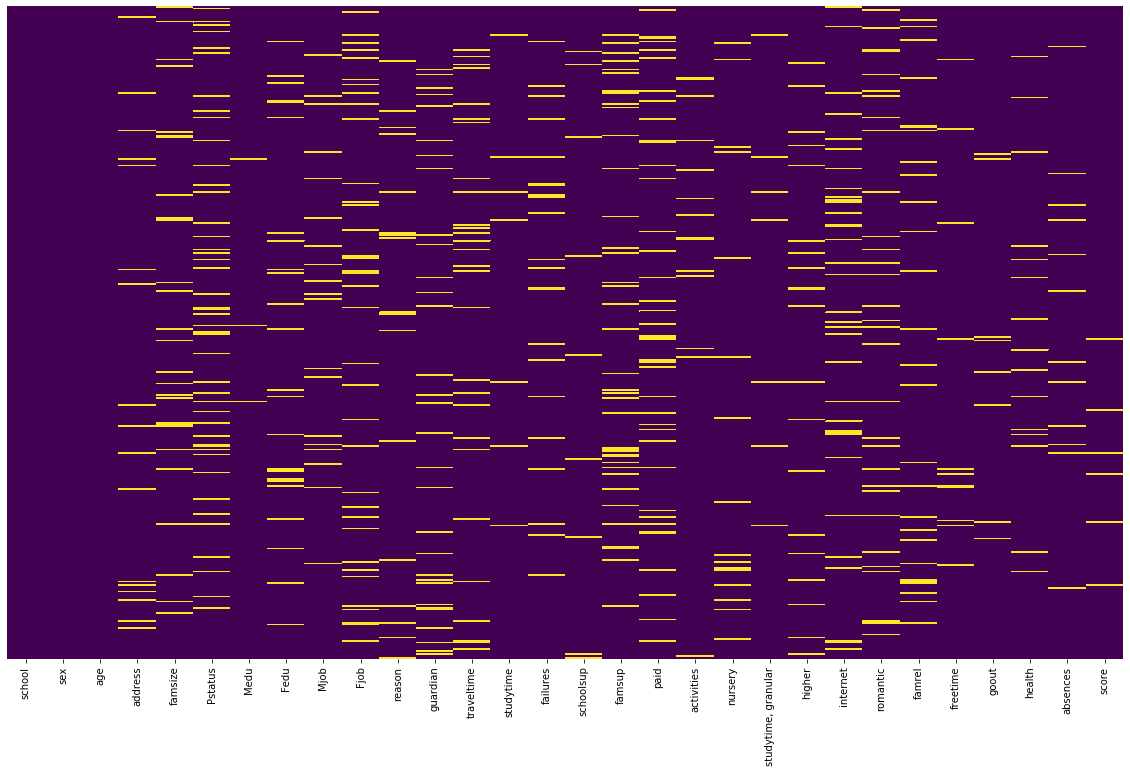

In [20]:
null_values = pd.DataFrame(stud.isnull().sum())
null_values.columns = ['values']
null_values.sort_values(by=['values'], inplace=True, ascending=False)
display(null_values)

display(null_values.groupby(pd.cut(null_values["values"],
                            np.arange(start=0, stop=100, step=38))).count())

fig, ax = plt.subplots(figsize=(20, 12))
sns_heatmap = sns.heatmap(stud.isnull(),
                          yticklabels=False, cbar=False, cmap='viridis')

Определим общее кол-во строк с пропусками.

In [21]:
print("Строк в изначальном датасете:", len(stud.index))
print("Строк с пропусками {} - {:.2%}"
      .format(len(stud.index)-len(stud.dropna().index),
              1-len(stud.dropna().index)/len(stud.index)))

Строк в изначальном датасете: 395
Строк с пропусками 298 - 75.44%


### Выводы:
1. В 27 столбцах есть пропуски, и только 3 столбца пропусков не содержат.
2. В 3 столбцах пропусков больше 10% пропусков ('Pstatus', 'paid', 'famsup').
3. Хотя пропусков в отдельных столбцах немного, по строкам они распределены неравномерно. Удалив все строки, в которых есть хотя бы один пропуск, мы потеряем 75% информации. Необходимо проанализировать данные и заполнить пропуски.

[К содержанию](#0)

<a id='3'></a>
# 3. Первичный общий анализ столбцов

In [22]:
# Вызовем функцию для отображения информации по столбцам
get_columns_info(stud)

,column_name,stud_type,total_values,null_values,unique_values,min_value,max_value,P25,P50,P75,IQR,border_1,border_2
0,school,object,395,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sex,object,395,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,age,int64,395,0,8,15,22,16.0,17.0,18.0,2.0,13.0,21.0
3,address,object,378,17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,famsize,object,368,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pstatus,object,350,45,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Medu,float64,392,3,5,0,4,2.0,3.0,4.0,2.0,-1.0,7.0
7,Fedu,float64,371,24,6,0,40,2.0,2.0,3.0,1.0,0.5,4.5
8,Mjob,object,376,19,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fjob,object,359,36,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Выводы:
1. 13 столбцов содержат категориальные признаки ('Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health').
2. 12 столбцов содержат категориальные бинарные признаки ('sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic').
3. 1 столбец содержит номинативный признак ('school'), который фактически явлется бинарным.
4. 3 столбца содержат числовые признаки (age, absences, score).
5. Столбец Fedu содержит некорректное значение-выброс (40). По условию значение столбца не более 4.
6. В столбце famrel есть отрицательное значение. По условиям значение не может быть меньше 1.
7. В столбце absences есть значения, которые потенциально могут быть выбросами.


[К содержанию](#0)

<a id='4'></a>
# 4. Анализ отдельных столбцов

<a id='4_1'></a>
## 4.1. Анализ столбцов с числовыми признаками

<a id='4_1_a'></a>
### Столбец 'score' (целевая переменная). Баллы по госэкзамену.

Уникальных значений: 18
Пропусков: 6
Мода: 50.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB
None


,score
count,389.000000
mean,52.262211
std,22.919022
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


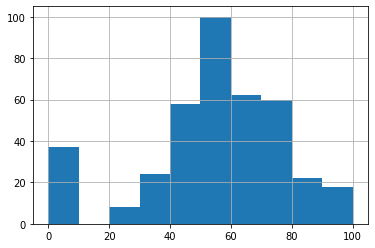

In [23]:
get_column_info('score')

В столбце 6 пропусков. Т.к. это целевая переменная, удалим строки с пропусками.

In [24]:
print(stud.shape)
stud.dropna(subset=['score'], inplace=True)

(395, 30)


In [25]:
stud.shape

(389, 30)

Распределение выглядит нормальным, но странным кажется достаточно большое кол-во строк с нулевыми значениями.  
Посмотрим, сколько таких строк.

In [27]:
print("Строк с нулем {} - {:.2%}"
      .format(len(stud[stud.score == 0].index),
              len(stud[stud.score == 0].index)/len(stud.index)))

Строк с нулем 37 - 9.51%


Отфильтруем выбросы с помощью формулы интерквартильного расстояния.

Минимум: 0.0, Максимум: 100.0
25-й перцентиль: 40.0, Медиана: 55.0, 75-й перцентиль: 70.0, IQR: 30.0.
Границы выбросов: [-5.0, 115.0]. Количество выбросов:  0


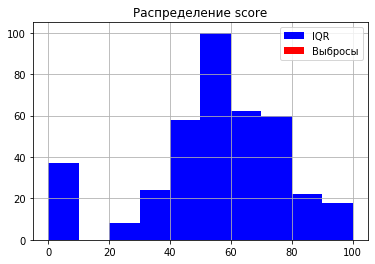

In [28]:
get_IQR_new(stud, 'score', 10)

Видим, что нулевые значения не вышли за границы выбросов.

1. Большинство значений лежат в промежутке от 40 до 70, что соответствует логике.
2. Значение 0 встречается 37 раз, т.е. по имеющимся данным почти 10% учеников не заработали ни одного балла. Отсутствуют значения больше 0 и меньше 20. 
По поводу таких строк возникает 3 гипотезы:
    1. Ученик не явился на экзамен, либо его результаты были аннулированы. В этом случае такие строки следует анализировать отдельно, т.к. пропуск экзамена не имеет связи с остальными признаками. Ученик, будь он на экзамене, вполне мог получить высокий балл, и его нулевой результам может негативно сказаться на работе модели.
    2. 20 – проходной балл. Если результат ниже, то ставится 0. Т.е. экзамен не сдан.
    3. 20 – минимально возможный балл (выполнение хотя бы одного задания).
3. В столбце 6 пропусков. Строки с пропусками мы удалили.
4. Использовалась 100-балльная шкала оценки.

### Столбец 'age'. Возраст ученика (от 15 до 22).

Уникальных значений: 8
Пропусков: 0
Мода: 16
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
age    389 non-null int64
dtypes: int64(1)
memory usage: 6.1 KB
None


,age
count,389.000000
mean,16.673522
std,1.265662
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


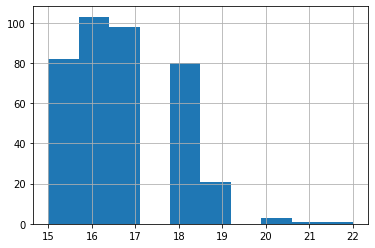

In [29]:
get_column_info('age')

1. В столбце 8 уникальных значений и нет пропусков.
2. Возраст выше 19 лет встечается лишь в 5 случаях. По условиям задачи такие значения допустимы, но логичным кажется то, что учеников старше 18 в школах быть не должно. Можно предположить, что ученики с большим возрастом по некой причине оставались на второй год, например. Либо это особенность системы обучения.

Проверим данные на выбросы.

Минимум: 15, Максимум: 22
25-й перцентиль: 16.0, Медиана: 17.0, 75-й перцентиль: 18.0, IQR: 2.0.
Границы выбросов: [13.0, 21.0]. Количество выбросов:  1


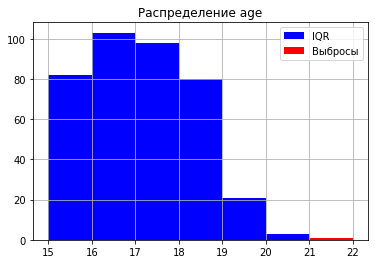

In [30]:
get_IQR_new(stud, 'age', 1)

Значение 22 – выброс.

Посмотрим, есть ли связь между возрастом и результатом экзамена.

In [31]:
stud_age = stud[(stud.age > 19)][['age', 'score']]
stud_age['median_score'] = stud.score[(stud.age <= 18)].median()
stud_age

,age,score,median_score
247,22,40.0,55.0
306,20,90.0,55.0
376,20,75.0,55.0
390,20,45.0,55.0
392,21,35.0,55.0


У 3 из 5 учеников старше 19 лет результат ниже медианы результатов более младших учеников.

Оставим только строки с возрастом меньше 22.

In [32]:
print(stud.shape)
stud = stud[stud['age'] < 22]

(389, 30)


In [33]:
stud.shape

(388, 30)

### Столбец 'absences '. Количество пропущенных занятий.

Уникальных значений: 36
Пропусков: 11
Мода: 0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
absences    377 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,absences
count,377.000000
mean,7.297082
std,23.642659
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


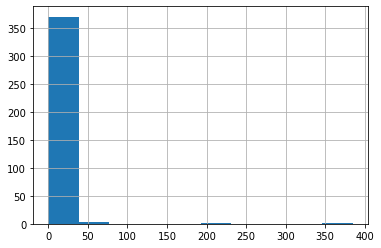

In [34]:
get_column_info('absences')

Присутствуют очень большие значения, которые необходимо дополнительно проанализировать.

Проверим потенциальные выбросы.

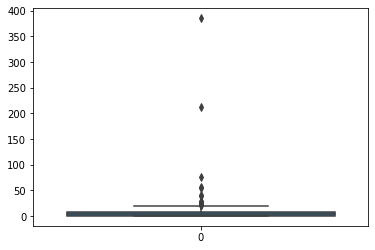

In [35]:
sns.boxplot(data=stud.absences)

Минимум: 0.0, Максимум: 385.0
25-й перцентиль: 0.0, Медиана: 4.0, 75-й перцентиль: 8.0, IQR: 8.0.
Границы выбросов: [-12.0, 20.0]. Количество выбросов:  17


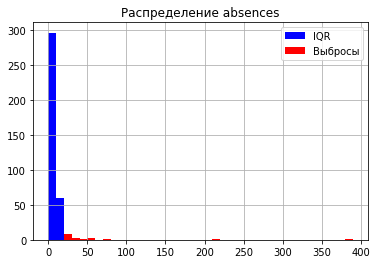

In [36]:
get_IQR_new(stud, 'absences', 10)

Значения выше 20 (17 строк) попали в выбросы. Посмотрим на эти строки.

In [39]:
stud[stud.absences > 20].sort_values('absences', ascending=False) \
    [['age', 'studytime', 'paid', 'higher', 'health', 'absences', 'score']]

,age,studytime,paid,higher,health,absences,score
222,16,2.0,no,yes,3.0,385.0,85.0
390,20,2.0,yes,yes,4.0,212.0,45.0
276,18,2.0,no,no,5.0,75.0,45.0
183,17,2.0,no,yes,1.0,56.0,40.0
74,16,2.0,yes,yes,5.0,54.0,55.0
315,19,3.0,no,yes,3.0,40.0,55.0
307,19,1.0,yes,yes,4.0,38.0,40.0
280,17,1.0,yes,yes,5.0,30.0,40.0
205,17,3.0,yes,yes,5.0,28.0,45.0
103,15,2.0,yes,yes,2.0,26.0,30.0


Связанные признаки для 2 учеников с наибольшим кол-вом пропусков (385, 212) не выглядят странными. Оба ученика уделяют достаточное время учебе, хотят получить высшее образование, имеют хорошое здоровье. У первого ученика высокий балл, а у второго – низкий. Поскольку объяснения такому большому кол-ву пропусков нет, отнесем их к выбросам и удалим.

In [40]:
print(stud.shape)
stud = stud[(stud['absences'] < 212) | (stud['absences'].isna())]

(388, 30)


In [41]:
stud.shape

(386, 30)

Посмотрим на связь с целевой переменной для оставшихся строк и только для случаев, где результат экзамена не равен 0.

In [53]:
# Датафрейм для отсутствий и ненулевого результата
stud_abs_score = stud[stud.score > 0][['absences', 'score']]

# Сводные данные по баллам с группировкой
stud_abs_score.groupby(pd.cut(stud_abs_score["absences"],
                              np.arange(start=0, stop=100, step=10),
                              include_lowest=True)) \
                              .agg({'score': ['count', 'min', 'median', 'mean',
                                              pd.Series.mode, 'max']})

score                                                   
               count   min median       mean                mode    max
absences                                                               
(-0.001, 10.0]   277  25.0   55.0  59.079422                  50  100.0
(10.0, 20.0]      47  25.0   50.0  50.319149        [55.0, 65.0]   80.0
(20.0, 30.0]      10  20.0   50.0  53.500000  [45.0, 55.0, 90.0]   90.0
(30.0, 40.0]       2  40.0   47.5  47.500000        [40.0, 55.0]   55.0
(40.0, 50.0]       0   NaN    NaN        NaN                None    NaN
(50.0, 60.0]       2  40.0   47.5  47.500000        [40.0, 55.0]   55.0
(60.0, 70.0]       0   NaN    NaN        NaN                None    NaN
(70.0, 80.0]       1  45.0   45.0  45.000000                  45   45.0
(80.0, 90.0]       0   NaN    NaN        NaN                None    NaN

In [54]:
# Общие итоги
stud_abs_score.groupby([True]*len(stud_abs_score)) \
    .agg({'score': ['count', 'min', 'median', 'mean', pd.Series.mode, 'max']})

score                                     
     count   min median       mean  mode    max
True   349  20.0   55.0  57.765043  50.0  100.0

Ученики, пропустившие до 10 занятий показывают более высокий результат, что нормально. Ученики из следующей группы (11-20 пропусков) – чуть более низкий, что тоже нормально. А результат учеников третьей группы уже не ухудшается, что странно. Ученики с большим кол-вом пропусков имеют более низкий результат, но таких учеников не много.

Если руководстововаться здравым смыслом, то значения больше 20 выбросами не являются, поэтому их оставим.

[К содержанию](#0)

<a id='4_2'></a>
## 4.2. Анализ столбцов с категориальными небинарными признаками

<a id='4_2_Medu'></a>
### Столбец 'Medu'. Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Уникальных значений: 5
Пропусков: 3
Мода: 4.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
Medu    383 non-null float64
dtypes: float64(1)
memory usage: 6.0 KB
None


,Medu
count,383.000000
mean,2.770235
std,1.097094
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


,Medu
4.0,131
2.0,98
3.0,95
1.0,56
0.0,3


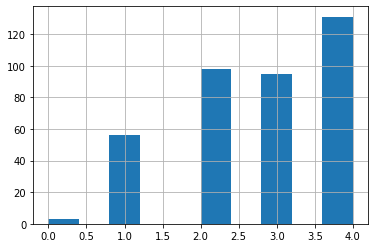

In [55]:
get_column_info('Medu')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 3 пропуска, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много. Один из вариантов – заполнить модой.
3. Значение 0 встречается очень редко, но оно есть в условиях, да и по здравому смыслу может присутствовать.

### Столбец 'Fedu'. Образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Уникальных значений: 6
Пропусков: 24
Мода: 2.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
Fedu    362 non-null float64
dtypes: float64(1)
memory usage: 6.0 KB
None


,Fedu
count,362.000000
mean,2.632597
std,2.249121
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,40.000000


,Fedu
2.0,104
3.0,93
4.0,88
1.0,74
0.0,2
40.0,1


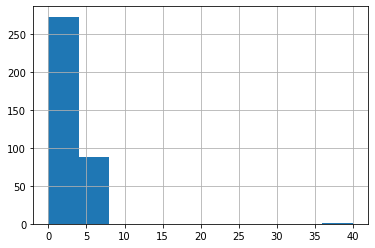

In [56]:
get_column_info('Fedu')

Значение 40 является выбросом. Можно предположить, что корректное значение – 4, поэтому обновим его в датафрейме.

In [57]:
stud.Fedu.value_counts()

2.0     104
3.0      93
4.0      88
1.0      74
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [58]:
if len(stud.loc[stud['Fedu'] == 40].index) > 0:
    stud.at[stud.loc[stud['Fedu'] == 40].index[0], 'Fedu'] = 4
stud.Fedu.value_counts()

2.0    104
3.0     93
4.0     89
1.0     74
0.0      2
Name: Fedu, dtype: int64

1. Это категориальный признак. Для всех строк, кроме той, которая была исключена, значения соответствуют описанным в задаче.
2. В столбце 24 пропуска, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много.
3. Значение 0 встречается очень редко, но оно есть в условиях и по здравому смыслу может присутствовать.

### Столбец 'Mjob'. Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое).

Уникальных значений: 5
Пропусков: 19
Мода: other
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
Mjob    367 non-null object
dtypes: object(1)
memory usage: 16.0+ KB
None


,Mjob
count,367
unique,5
top,other
freq,127


,Mjob
other,127
services,95
at_home,58
teacher,55
health,32


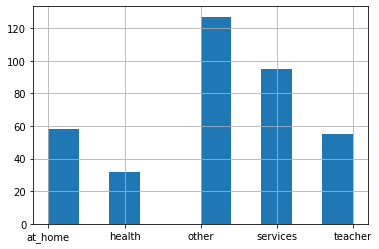

In [59]:
get_column_info('Mjob')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 19 пропусков, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много. Одним из допустимых вариантов может быть использование для пропусков варианта 'other', поскольку он встречается чаще всего. Однако, в данных много строк и с 'services'.

### Столбец 'Fjob'. Работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое).

Уникальных значений: 5
Пропусков: 36
Мода: other
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
Fjob    350 non-null object
dtypes: object(1)
memory usage: 16.0+ KB
None


,Fjob
count,350
unique,5
top,other
freq,194


,Fjob
other,194
services,97
teacher,28
at_home,16
health,15


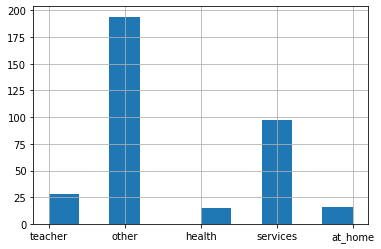

In [60]:
get_column_info('Fjob')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 36 пропусков, и это одно из самых больших значений в датасете. Так же как и в столбце 'Medu' преобладает вариант 'other', но с большим весом. На втором месте опять же 'services'. В данном случае больше оснований заполнить пропуски именно 'other'. Имеет смысл вернуться к заполнению пропусков в этих столбцах после анализа остальных.

### Столбец 'reason'. Причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Уникальных значений: 4
Пропусков: 17
Мода: course
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
reason    369 non-null object
dtypes: object(1)
memory usage: 16.0+ KB
None


,reason
count,369
unique,4
top,course
freq,134


,reason
course,134
reputation,102
home,101
other,32


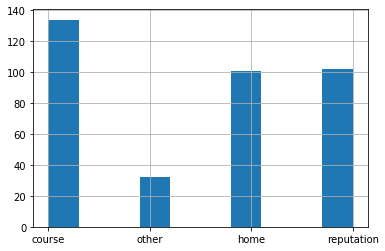

In [61]:
get_column_info('reason')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 17 пропусков, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много.
3. Распределение нормальное.

### Столбец 'guardian'. опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Уникальных значений: 3
Пропусков: 30
Мода: mother
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
guardian    356 non-null object
dtypes: object(1)
memory usage: 16.0+ KB
None


,guardian
count,356
unique,3
top,mother
freq,246


,guardian
mother,246
father,86
other,24


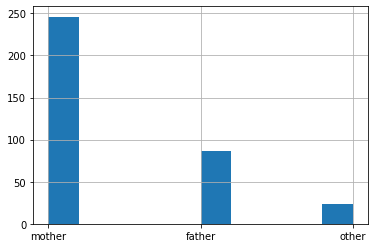

In [62]:
get_column_info('guardian')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 30 пропусков, который на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много. Возможный вариант для заполнения – 'mother', т.к. он встречается более, чем в 2 раза чаще двух других.

### Столбец 'traveltime'. Время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Уникальных значений: 4
Пропусков: 28
Мода: 1.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
traveltime    358 non-null float64
dtypes: float64(1)
memory usage: 16.0 KB
None


,traveltime
count,358.000000
mean,1.438547
std,0.694412
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


,traveltime
1.0,236
2.0,94
3.0,21
4.0,7


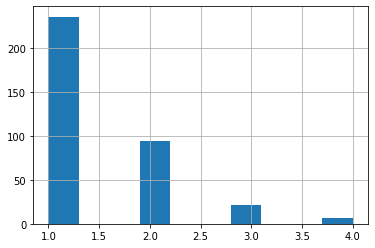

In [63]:
get_column_info('traveltime')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 28 пропусков, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много. В дальнейшем имеет смысл проверить связь этого столбца с другими и на основании этого заполнить пропуски.

### Столбец 'studytime'. время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Уникальных значений: 4
Пропусков: 7
Мода: 2.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
studytime    379 non-null float64
dtypes: float64(1)
memory usage: 16.0 KB
None


,studytime
count,379.000000
mean,2.039578
std,0.848912
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


,studytime
2.0,187
1.0,102
3.0,63
4.0,27


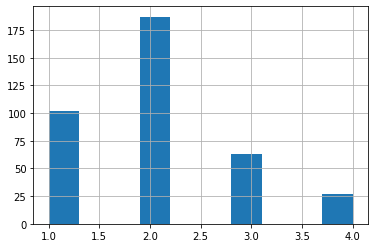

In [64]:
get_column_info('studytime')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 7 пропусков, которые на данном этапе не представляется возможность заполнить.

### Столбец 'studytime, granular'. Описание в задаче отсутствует.

Уникальных значений: 4
Пропусков: 7
Мода: -6.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
studytime_granular    379 non-null float64
dtypes: float64(1)
memory usage: 6.0 KB
None


,studytime_granular
count,379.000000
mean,-6.118734
std,2.546736
min,-12.000000
25%,-6.000000
50%,-6.000000
75%,-3.000000
max,-3.000000


,studytime_granular
-6.0,187
-3.0,102
-9.0,63
-12.0,27


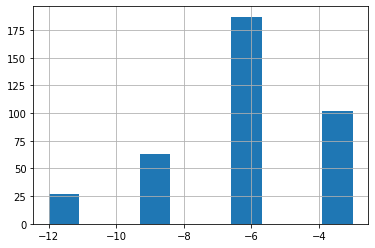

In [66]:
# Переименуем столбец, убрав пробел
stud.rename(columns={'studytime, granular': 'studytime_granular'},
            inplace=True)
get_column_info('studytime_granular')

Проверим корреляцию со столбцом 'studytime' и сравним значения двух столбцов.

In [68]:
display(stud[['studytime', 'studytime_granular']].corr())
display(pd.DataFrame(stud.studytime_granular/stud.studytime) \
        .iloc[0].value_counts())

,studytime,studytime_granular
studytime,1.0,-1.0
studytime_granular,-1.0,1.0


-3.0    1
Name: 0, dtype: int64

Т.к. значения столбца studytime_granular – это значения столбца studytime, умноженные на -3, этот столбец можно исключить из датафрейма.

In [70]:
print(len(stud.columns))
if 'studytime_granular' in stud.columns:
    stud.drop(['studytime_granular'], axis=1, inplace=True)

29


In [71]:
len(stud.columns)

29

### Столбец 'failures'. количество внеучебных неудач (n, если 1<=n<3, иначе 0)

Уникальных значений: 4
Пропусков: 22
Мода: 0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
failures    364 non-null float64
dtypes: float64(1)
memory usage: 6.0 KB
None


,failures
count,364.000000
mean,0.315934
std,0.713250
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


,failures
0.0,289
1.0,48
2.0,14
3.0,13


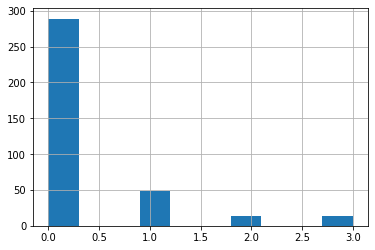

In [72]:
get_column_info('failures')

1. Это категориальный признак. В условии нет случая n=3.
2. В столбце 22 пропуска, которые, как кажется на данном этапе, допустимо заполнить нулями. После анализа всех столбцов поймем, есть ли в этом необходимость.

### Столбец 'famrel'. Cемейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Уникальных значений: 6
Пропусков: 27
Мода: 4.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
famrel    359 non-null float64
dtypes: float64(1)
memory usage: 6.0 KB
None


,famrel
count,359.000000
mean,3.930362
std,0.926426
min,-1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


,famrel
4.0,178
5.0,95
3.0,62
2.0,16
1.0,7
-1.0,1


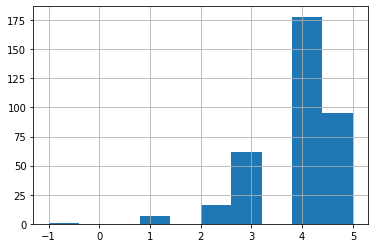

In [73]:
get_column_info('famrel')

Согласно описанию минимальное значение для данного признака – это 1. Можно предположить, что корректным значенеим будет как раз единица. Исправим значение в датафрейме.

In [74]:
if len(stud.loc[stud['famrel'] == -1].index) > 0:
    stud.at[stud.loc[stud['famrel'] == -1].index[0], 'famrel'] = 1

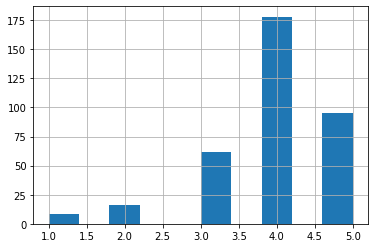

In [75]:
stud.famrel.hist()

1. Это категориальный признак. Для всех строк, кроме той, которая была исправлена, значения соответствуют описанным в задаче.
2. В столбце 27 пропусков, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много.

### Столбец 'freetime'. Cвободное время после школы (от 1 - очень мало до 5 - очень мого)

Уникальных значений: 5
Пропусков: 9
Мода: 3.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
freetime    377 non-null float64
dtypes: float64(1)
memory usage: 16.0 KB
None


,freetime
count,377.000000
mean,3.217507
std,0.992210
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


,freetime
3.0,151
4.0,109
2.0,63
5.0,36
1.0,18


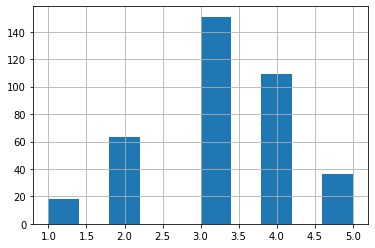

In [76]:
get_column_info('freetime')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 9 пропусков, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много.

### Столбец 'goout'. Проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Уникальных значений: 5
Пропусков: 7
Мода: 3.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
goout    379 non-null float64
dtypes: float64(1)
memory usage: 16.0 KB
None


,goout
count,379.000000
mean,3.092348
std,1.110041
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


,goout
3.0,126
2.0,101
4.0,80
5.0,50
1.0,22


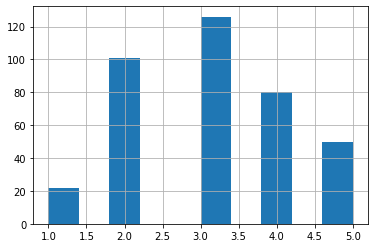

In [77]:
get_column_info('goout')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 7 пропусков, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много.

### Столбец 'health'. Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Уникальных значений: 5
Пропусков: 15
Мода: 5.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
health    371 non-null float64
dtypes: float64(1)
memory usage: 16.0 KB
None


,health
count,371.000000
mean,3.536388
std,1.401022
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


,health
5.0,137
3.0,87
4.0,59
1.0,46
2.0,42


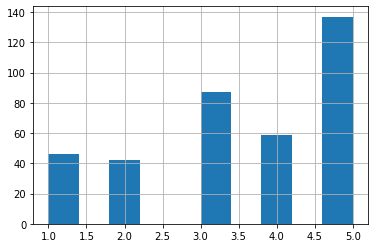

In [78]:
get_column_info('health')

1. Это категориальный признак. Для всех строк значения соответствуют описанным в задаче.
2. В столбце 15 пропусков, которые на данном этапе не представляется возможность заполнить, т.к. вариантов для заполнения слишком много.

### Столбец 'school'. Аббревиатура школы, в которой учится ученик.

Уникальных значений: 2
Пропусков: 0
Мода: GP
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
school    386 non-null object
dtypes: object(1)
memory usage: 16.0+ KB
None


,school
count,386
unique,2
top,GP
freq,342


,school
GP,342
MS,44


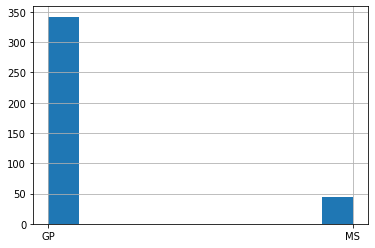

In [79]:
get_column_info('school')

1. В столбце 2 уникальных значения и нет пропусков. 
2. В 88% строк находится значение 'GP'. Либо в этой школе действительно больше учеников, либо в датасете преобладает информация по ученикам школы 'GP'.

[К содержанию](#0)

<a id='4_3'></a>
## 4.3. Анализ столбцов с категориальными бинарными признаками

In [81]:
get_binary_columns_info(stud[['sex', 'address', 'famsize', 'Pstatus',
                              'schoolsup', 'famsup', 'paid', 'activities',
                              'nursery', 'higher', 'internet', 'romantic']])

,column_name,stud_type,total_values,null_values,unique_values,top,freq_top,least,freq_least
0,sex,object,386,0,2,F,203,M,183
1,address,object,371,15,2,U,288,R,83
2,famsize,object,359,27,2,GT3,253,LE3,106
3,Pstatus,object,341,45,2,T,306,A,35
4,schoolsup,object,377,9,2,no,329,yes,48
5,famsup,object,349,37,2,yes,215,no,134
6,paid,object,347,39,2,no,195,yes,152
7,activities,object,372,14,2,yes,192,no,180
8,nursery,object,371,15,2,yes,295,no,76
9,higher,object,366,20,2,yes,348,no,18


__Столбец 'sex'__ не содержит пропусков и имеет нормальное распределение. Девочек незначительно больше.  
__Столбец 'address'__ содержит 15 пропусков. Большинство учеников живут в городе. Можно допустить использование значения 'U' для пропусков.  
__Столбец 'famsize'__ содержит 27 пропусков. Семьи из более, чем 3 человек, встречаются в 2.5 раза чаще. Можно допустить использование значения 'GT3' для пропусков, но с меньшей долей достоверности.  
__Столбец 'Pstatus'__ содержит 45 пропусков (очень много). Почти в 80% случаев (по известным данным) родители живут вместе. Можно допустить использование значения 'T' для пропусков.  
__Столбец 'schoolsup'__ содержит 9 пропусков. Дополнительная образовательная поддержка есть лишь у 10% учеников, значит можно допустить использование значения 'no' для пропусков.  
__Столбец 'famsup'__ содержит 37 пропусков (очень много). На текущем этапе нет ясности, каким образом их заполнить, т.к. распределение в столбце относительно ровное. В случае, если далее мы поймем, что этот признак важный, нужен будет дополнительный анализ.  
__Столбец 'paid'__ содержит 39 пропусков (очень много). На текущем этапе нет ясности, каким образом их заполнить, т.к. распределение в столбце относительно ровное. В случае, если далее мы поймем, что этот признак важный, нужен будет дополнительный анализ.   
__Столбец 'activities'__ содержит 14 пропусков. На текущем этапе нет ясности, каким образом их заполнить, т.к. распределение в столбце относительно ровное.    
__Столбец 'nursery'__ содержит 15 пропусков. В 75% случаев (по известным данным) ученики посещали детский сад. Можно допустить использование значения 'yes' для пропусков.  
__Столбец 'higher'__ содержит 20 пропусков. В 90% случаев (по известным данным) ученики хотят получить высшее образование. Можно допустить использование значения 'yes' для пропусков.  
__Столбец 'internet'__ содержит 34 пропуска. В 77% случаев (по известным данным) у учеников есть интернет. Можно допустить использование значения 'yes' для пропусков.  
__Столбец 'romantic'__ содержит 31 пропуск. На текущем этапе нет ясности, каким образом их заполнить, т.к. распределение в столбце относительно ровное.    

[К содержанию](#0)

<a id='5'></a>
# 5. Корреляционный анализ числовых данных

Истинно числовых признаков всего 3 – это age, absences, score.

Составим таблицу коррелляций и визуализируем, как связаны между собой признаки.

In [82]:
# Датафрейм с числовыми признаками без пропусков
stud_num = stud[['age', 'absences', 'score']].dropna()

display(stud_num.corr())

,age,absences,score
age,1.000000,0.161980,-0.147023
absences,0.161980,1.000000,0.033546
score,-0.147023,0.033546,1.000000


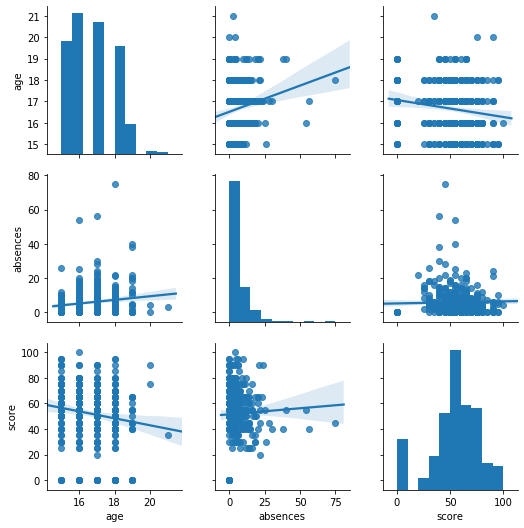

In [83]:
sns.pairplot(stud_num, kind = 'reg')

(3.0, 0.0)

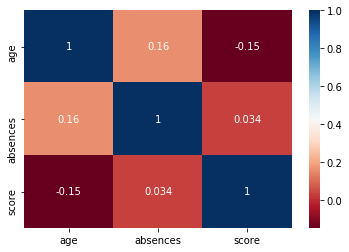

In [84]:
df_corr = stud_num.corr()
ax = sns.heatmap(df_corr, annot=True, cmap="RdBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Существует слабая обратная корреляция между возрастом и результатом экзамена.
Значения признака 'absences' не коррелируют с целевой переменной. Как и было замечено на этапе анализа этого столбца, нет заметного ухудшения результатов с повышением кол-ва пропусков.

Принимаю решение исключить столбец 'absences' из-за низкой корреляции с целевой переменной.

In [85]:
print(len(stud.columns))
stud = stud.loc[:, stud.columns != 'absences']

29


In [86]:
len(stud.columns)

28

[К содержанию](#0)

<a id='6'></a>
# 6. Анализ номинативных переменных

<a id='6_1'></a>
## 6.1. Построение боксплотов.

In [88]:
# Список всех категориальных признаков
list_cat_all = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures', 'famrel',
                'freetime', 'goout', 'health', 'sex', 'address',
                'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'higher', 'internet', 'romantic',
                'school']

# Список категориальных бинарных признаков
list_cat_binary = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                   'famsup', 'paid', 'activities', 'nursery', 'higher',
                   'internet', 'romantic']

# Список категориальных небинарных признаков
list_cat_non_binary = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
                       'guardian', 'traveltime', 'studytime', 'failures',
                       'famrel', 'freetime', 'goout', 'health']

Построим боксплоты.

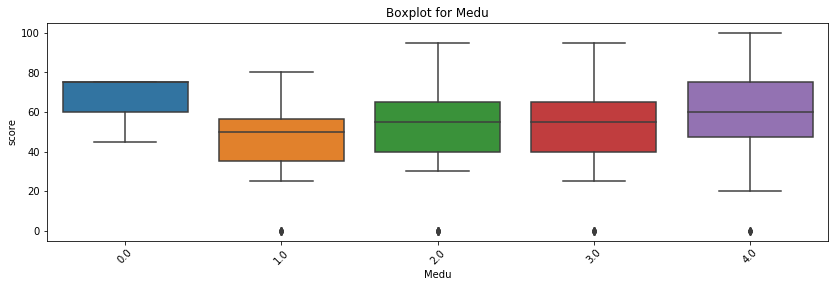

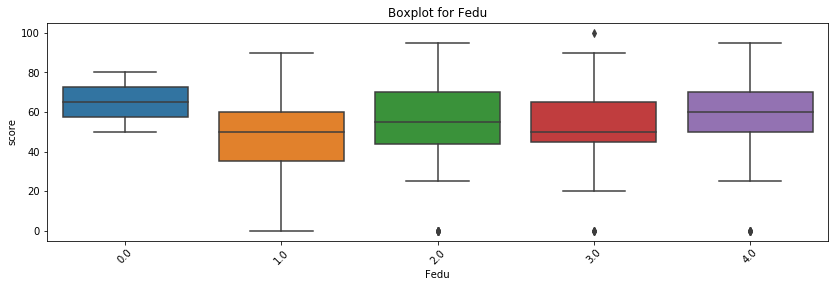

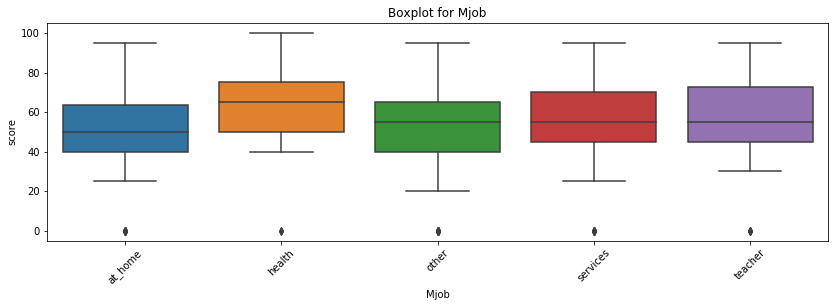

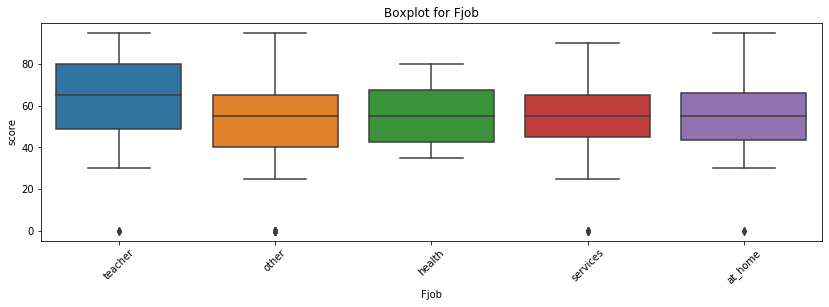

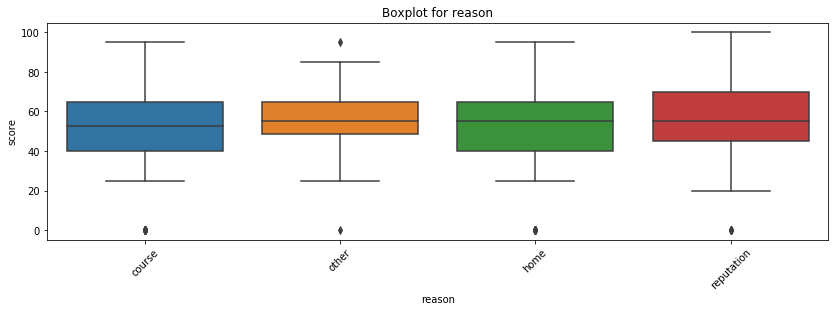

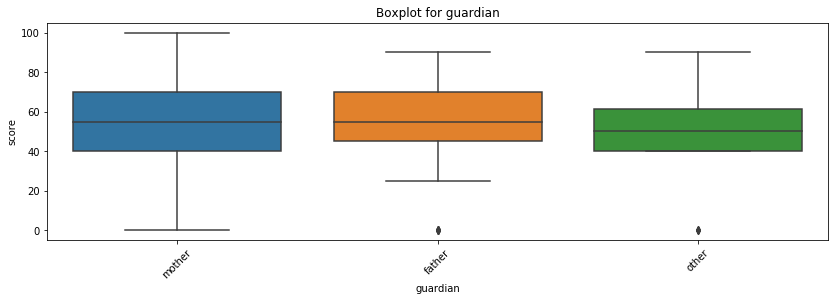

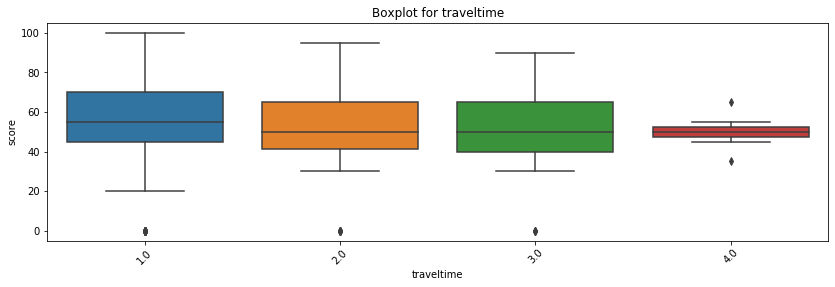

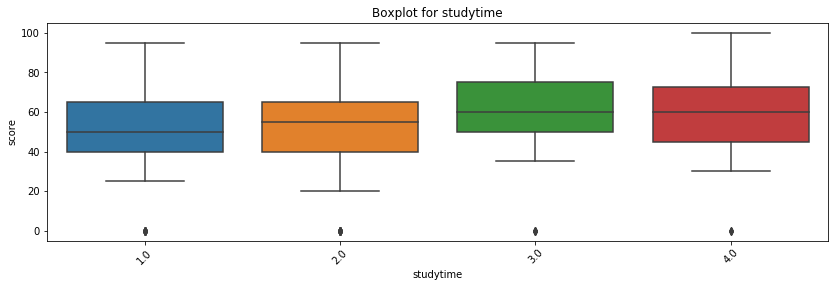

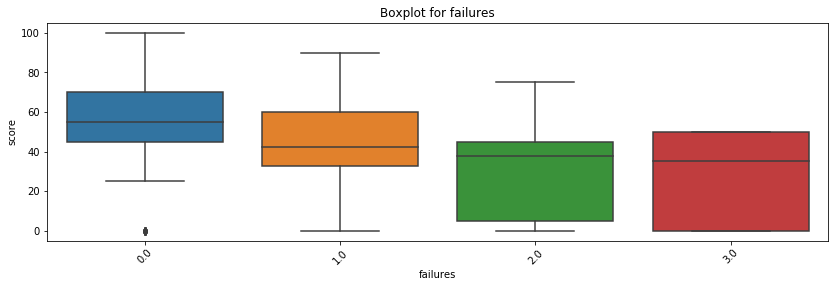

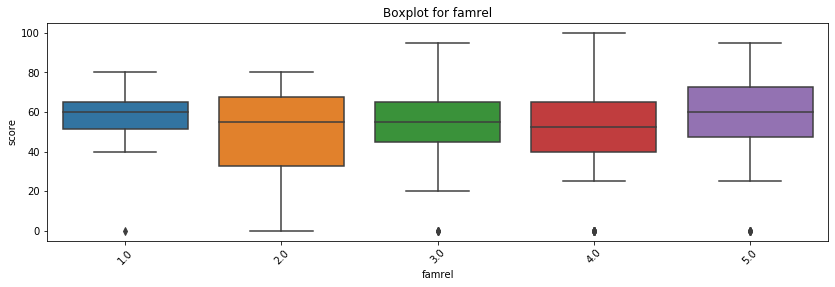

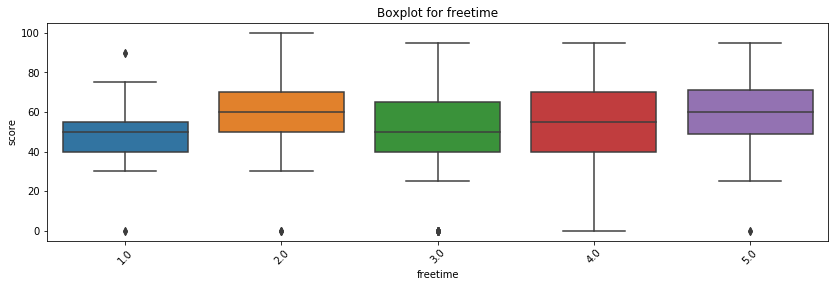

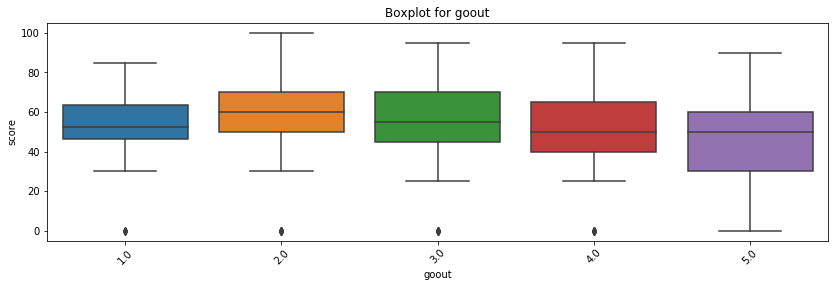

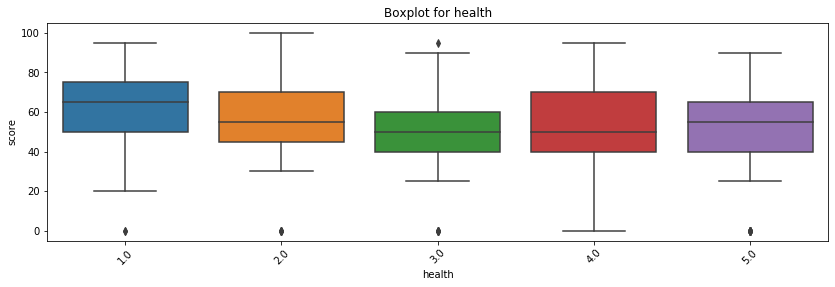

In [90]:
for col in list_cat_non_binary:
    get_boxplot(stud, col)

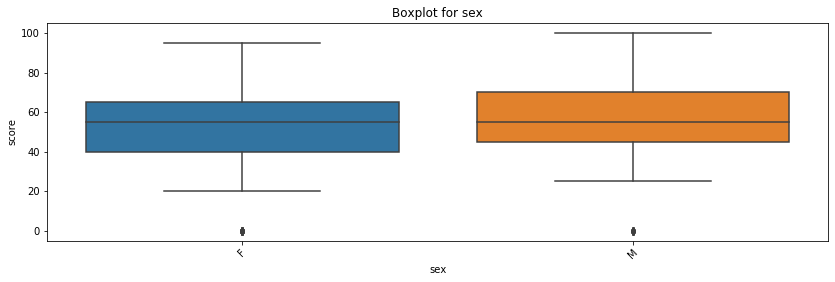

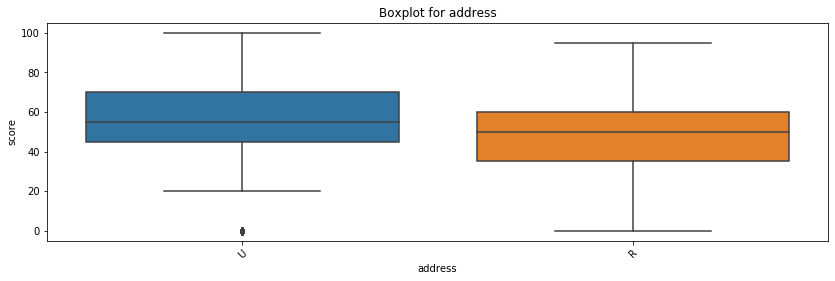

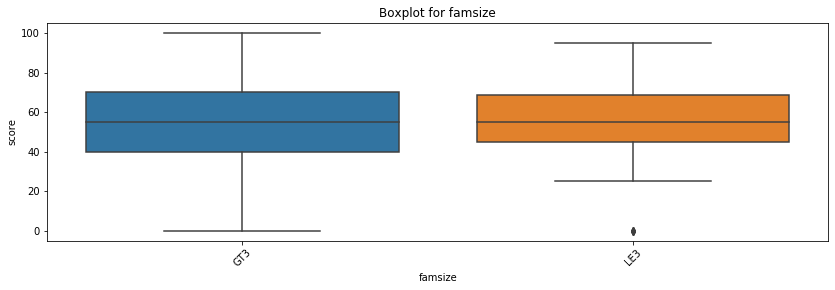

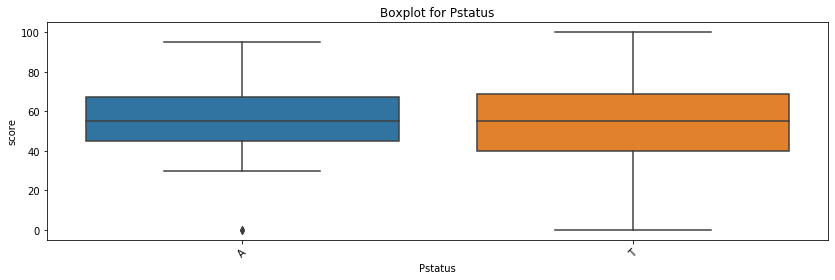

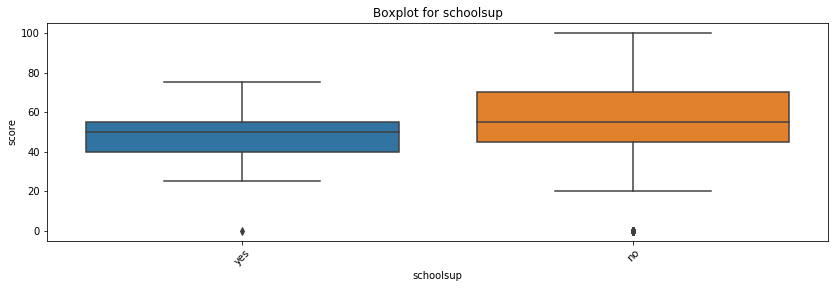

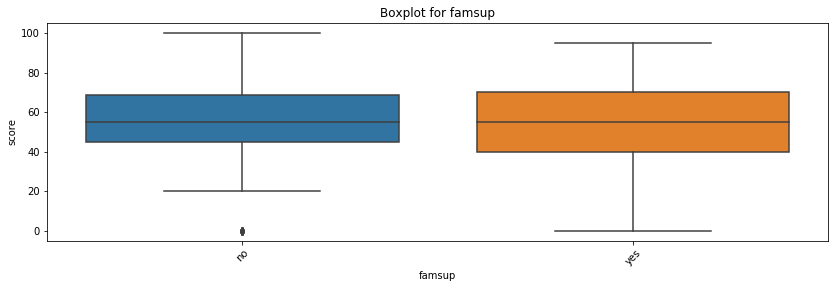

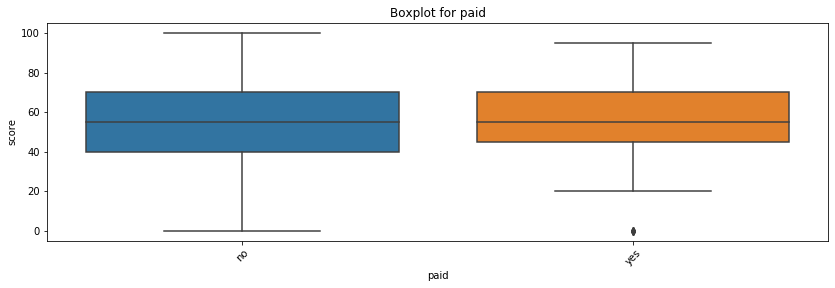

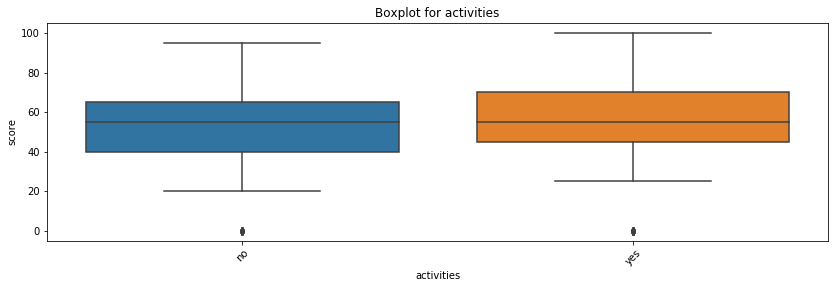

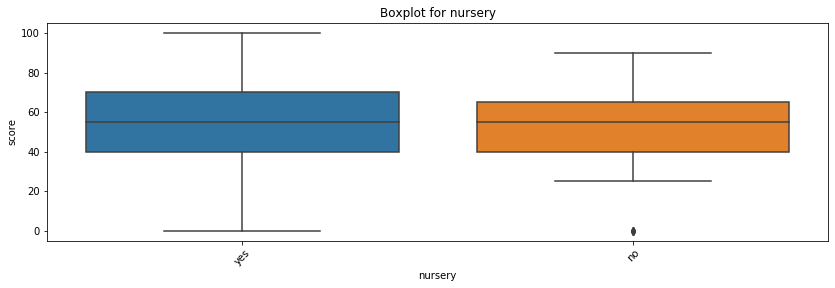

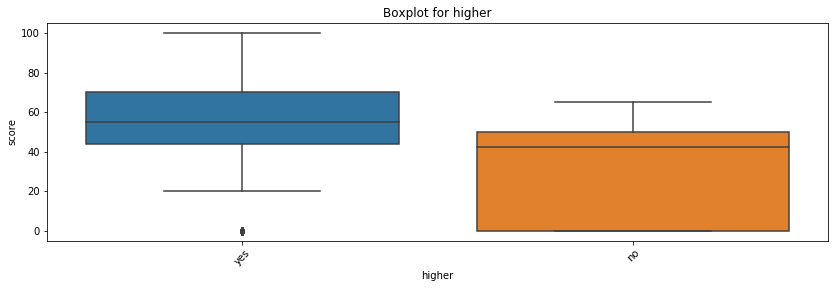

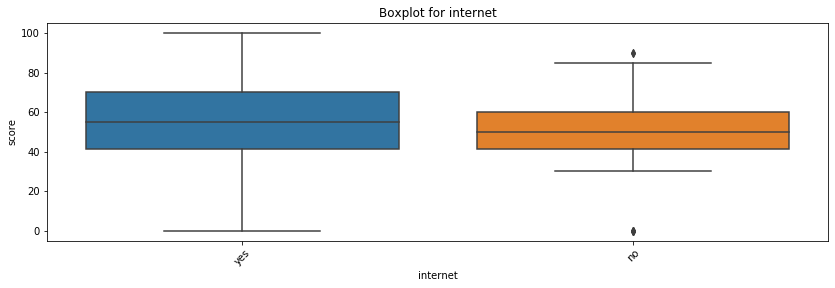

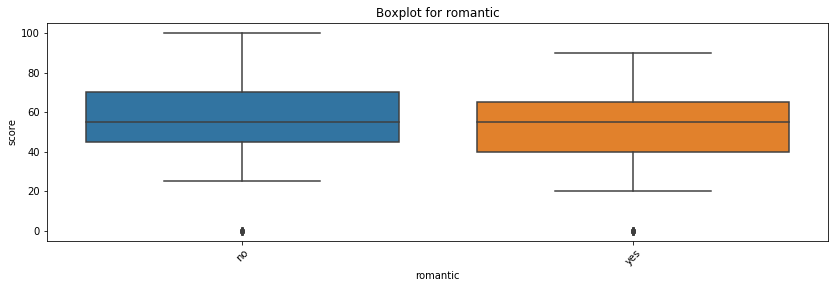

In [91]:
for col in list_cat_binary:
    get_boxplot(stud, col)

Визуально значимыми кажутся следующие признаки: 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'freetime', 'goout', 'health'; из бинарных: 'schoolsup', 'higher', 'internet'.

Боксплот по школе.

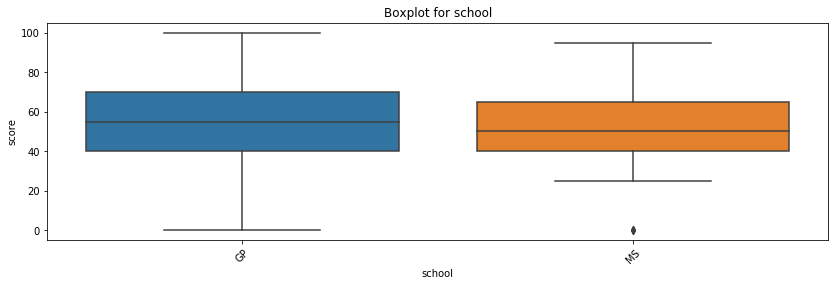

In [92]:
get_boxplot(stud, 'school')

Мы помним, что распределение в этом столбце неравномерное. По школе 'GP' значительно больше учеников, поэтому больше и результатов экзамена. Визуально не кажется, что этот признак связан с целевой переменной.

[К содержанию](#0)

<a id='6_2'></a>
## 6.2. Статистическая разница.

Проверим все категориальные признаки.

In [93]:
get_stat_dif_new(stud, list_cat_all, True)

Найдены статистически значимые различия для 7 колонок: ['Medu', 'Mjob', 'failures', 'sex', 'address', 'higher', 'romantic']
НЕ найдены статистически значимые различия для 19 колонок: ['Fedu', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'school']


Проведем статистический анализ для тех данных, где значение целевой переменной не равно 0.

In [94]:
stud_score = stud[stud.score != 0]
get_stat_dif_new(stud_score, list_cat_all, True)

Найдены статистически значимые различия для 9 колонок: ['Medu', 'Fedu', 'Mjob', 'studytime', 'failures', 'goout', 'sex', 'address', 'schoolsup']
НЕ найдены статистически значимые различия для 17 колонок: ['Fjob', 'reason', 'guardian', 'traveltime', 'famrel', 'freetime', 'health', 'famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'school']


Итого на данном этапе из 26 категориальных признаков:
1. 15 кандидатов на удаление: 'Fjob', 'Pstatus', 'activities', 'famrel', 'famsize', 'famsup', 'freetime', 'guardian', 'health', 'internet', 'nursery', 'paid', 'reason', 'school', 'traveltime'.
2. 11 оставляем: 'Fedu', 'Medu', 'Mjob', 'address', 'failures', 'goout', 'higher', 'romantic', 'schoolsup', 'sex', 'studytime'.

In [95]:
# Создадим отдельные списки колонок (удалить/оставить)
cols_to_drop = ['Fjob', 'Pstatus', 'activities', 'famrel', 'famsize',
                'famsup', 'freetime', 'guardian', 'health', 'internet',
                'nursery', 'paid', 'reason', 'school', 'traveltime']
cols_to_keep = ['Fedu', 'Medu', 'Mjob', 'address', 'failures', 'goout',
                'higher', 'romantic', 'schoolsup', 'sex', 'studytime']

Для проверки связи между категориальными признаками воспользуемся матрицей коэффицентов Крамера.

(26.0, 0.0)

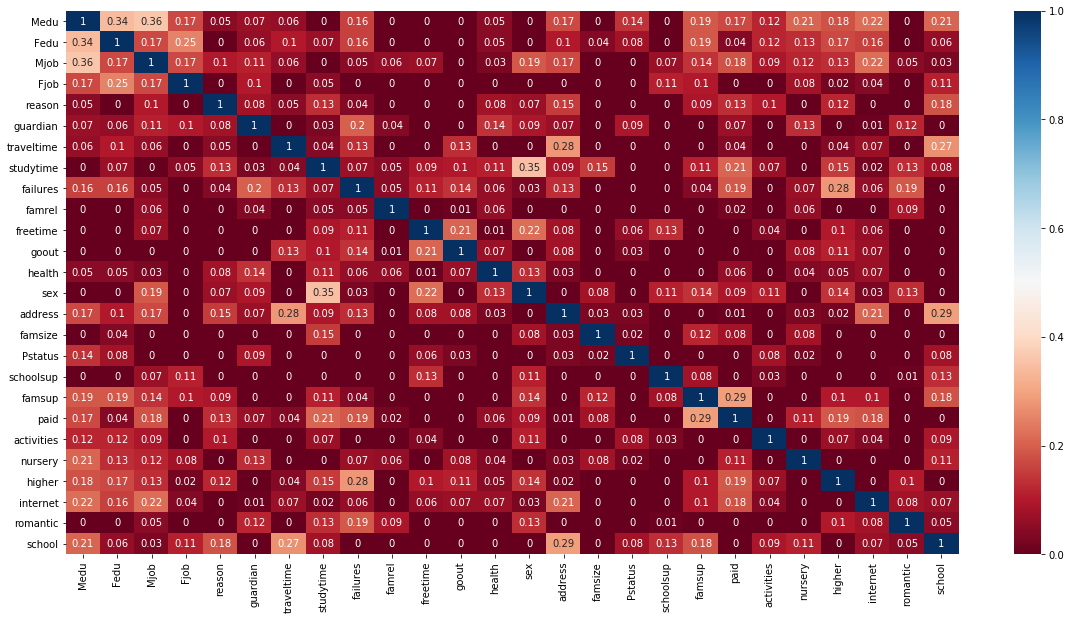

In [96]:
rows = []

data_encoded = stud[list_cat_all]

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        # Cramer's V test
        cramers = cramers_corrected_stat(data_encoded[var1], data_encoded[var2])
        # Keeping of the rounded value of the Cramer's V
        col.append(round(cramers, 2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=data_encoded.columns,
                  index=data_encoded.columns)

plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df, annot=True, cmap="RdBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

То же только для колонок, которые планируется оставить.

(11.0, 0.0)

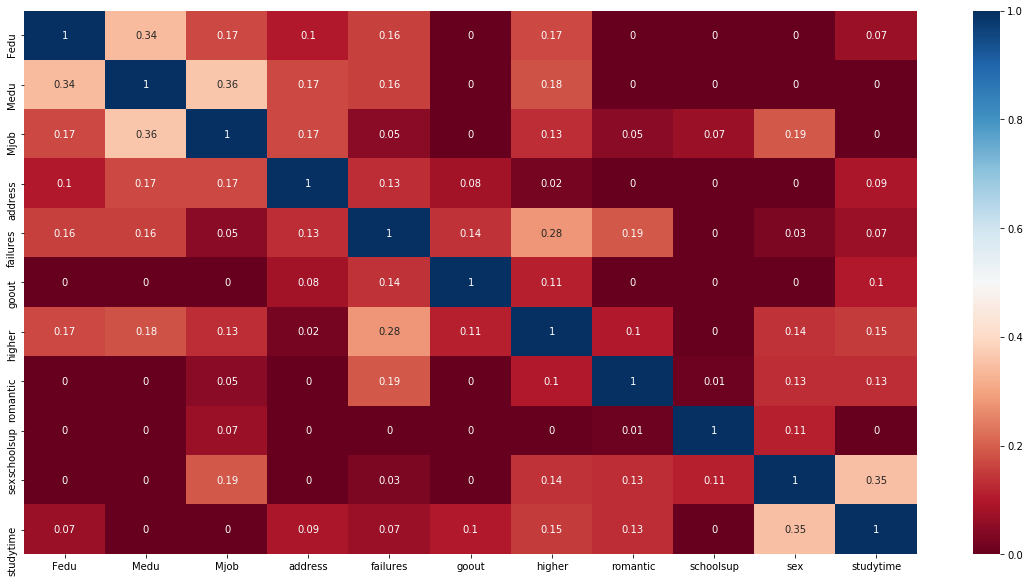

In [97]:
rows = []
data_encoded = stud[cols_to_keep]

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        # Cramer's V test
        cramers = cramers_corrected_stat(data_encoded[var1], data_encoded[var2])
        # Keeping of the rounded value of the Cramer's V
        col.append(round(cramers, 2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=data_encoded.columns,
                  index=data_encoded.columns)

plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df, annot=True, cmap="RdBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Видно, что признаки Medu и Fedu взаимосвязаны. Можно дополнительно проверить, так ли это.

In [98]:
# Сопоставим значения 2 колонок.
pd.crosstab(stud['Medu'], stud['Fedu'])

Fedu,0.0,1.0,2.0,3.0,4.0
Medu,,,,,
0.0,0,1,2,0,0
1.0,1,34,12,5,1
2.0,0,26,46,15,7
3.0,0,12,25,33,18
4.0,1,0,18,39,63


In [99]:
# Проверим, в скольки случаях значения совпадают
len(stud.query('Medu == Fedu'))

176

Также связаны признаки Medu/Mjob, Fedu/Fjob, traveltime/address/school, studytime/sex, higher/failures, paid/famsup.

[К содержанию](#0)

<a id='7'></a>
# 7. Доп. анализ кандитатов на удаление

Создадим колонки с dummy-переменными и проверим для них статистическую разницу.

In [100]:
for name in cols_to_drop:
    dummies = create_dummies(stud,name)
    
    get_stat_dif_new(dummies,list(dummies.columns[1:]),False)

Найдены статистически значимые различия для 2 колонок: ['freetime_2.0', 'freetime_3.0']
Найдены статистически значимые различия для 1 колонок: ['health_1.0']
Найдены статистически значимые различия для 1 колонок: ['paid_yes']


Для 3 признаков отдельные значения имеют значимые различия.

[К содержанию](#0)

<a id='8'></a>
# 8. Заполнение пропусков

Перед удалением столбцов из главного датасета заполним пропуски в оставшихся столбцах. В помеченных на удаление столбцах могут быть данные, которые помогут в этой задаче.

Сохраним неизмененный датафрейм в отдельной переменной.

In [101]:
stud_before_changes = stud.copy()

Сначала посмотрим, сколько строк останется, если удалить все, содержащие пропуски.

In [102]:
stud_dropped = stud.drop(cols_to_drop, axis=1)
print("Строк в датасете:", len(stud_dropped.index))
print("Строк с пропусками {} - {:.2%}"
      .format(len(stud_dropped.index)-len(stud_dropped.dropna().index),
              1-len(stud_dropped.dropna().index)/len(stud_dropped.index)))

Строк в датасете: 386
Строк с пропусками 125 - 32.38%


Сохраним результат в отдельном датафрейме.

In [103]:
stud_result_1 = stud_dropped.dropna()

# Проверим кол-во пропусков
stud_result_1.isnull().any().sum()

0

Также отдельно сохраним ещё один вариант, в котором пропуски в каждом столбце будут заполнены модой этого столбца.

In [104]:
stud_result_2 = stud_dropped

for col in stud_result_2.columns:
    stud_result_2[col].fillna(stud_result_2[col].mode()[0], inplace=True)

stud_result_2.isnull().any().sum()

0

Ещё раз посмотрим на колонки, которые было решено оставить.

In [105]:
print(*cols_to_keep)

Fedu Medu Mjob address failures goout higher romantic schoolsup sex studytime


In [106]:
get_columns_info(stud[cols_to_keep])

,column_name,stud_type,total_values,null_values,unique_values,min_value,max_value,P25,P50,P75,IQR,border_1,border_2
0,Fedu,float64,362,24,5,0.0,4.0,2.0,3.0,3.0,1.0,0.5,4.5
1,Medu,float64,383,3,5,0.0,4.0,2.0,3.0,4.0,2.0,-1.0,7.0
2,Mjob,object,367,19,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,address,object,371,15,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,failures,float64,364,22,4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,goout,float64,379,7,5,1.0,5.0,2.0,3.0,4.0,2.0,-1.0,7.0
6,higher,object,366,20,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,romantic,object,355,31,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,schoolsup,object,377,9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,sex,object,386,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для каждого столбца с пропусками попытаемся найти связь с теми признаками, которые в столбце заполнены.

### Столбец 'Fedu'. Образование отца 

In [108]:
# Все строки с пропусками
stud[stud.Fedu.isnull()][['Fedu', 'Medu', 'Mjob', 'Fjob']] \
    .sort_values('Fjob', ascending=False)

,Fedu,Medu,Mjob,Fjob
232,NaN,4.0,teacher,teacher
287,NaN,1.0,services,teacher
42,NaN,4.0,services,teacher
259,NaN,2.0,services,services
46,NaN,3.0,other,services
328,NaN,4.0,teacher,services
310,NaN,1.0,services,services
142,NaN,4.0,teacher,services
159,NaN,3.0,other,services
281,NaN,3.0,teacher,services


Посмотрим на связь с признаком 'Fjob' (работа отца).

In [109]:
stud[stud.Fedu.isna()]['Fjob'].value_counts()

services    8
other       7
teacher     3
at_home     2
health      2
Name: Fjob, dtype: int64

Fedu,0.0,1.0,2.0,3.0,4.0
Fjob,,,,,
at_home,0,3,6,3,2
health,0,1,1,3,8
other,2,46,58,50,31
services,0,17,25,30,17
teacher,0,0,0,0,25


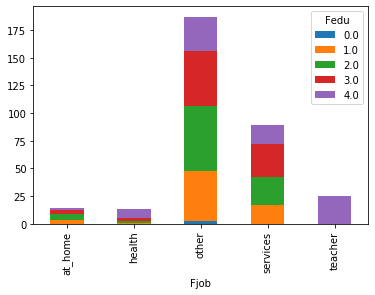

In [110]:
ct = pd.crosstab(stud['Fjob'], stud['Fedu'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

Посмотрим на связь с признаком 'Medu' (образование матери).

In [111]:
stud[stud.Fedu.isna()]['Medu'].value_counts()

4.0    10
3.0     7
2.0     4
1.0     3
Name: Medu, dtype: int64

Fedu,0.0,1.0,2.0,3.0,4.0
Medu,,,,,
0.0,0,1,2,0,0
1.0,1,34,12,5,1
2.0,0,26,46,15,7
3.0,0,12,25,33,18
4.0,1,0,18,39,63


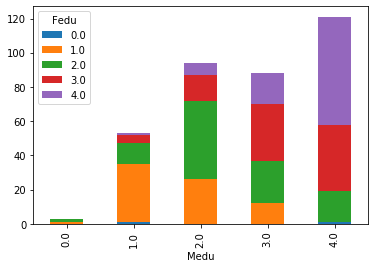

In [112]:
ct = pd.crosstab(stud['Medu'], stud['Fedu'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

#### Заполним модой по 'Medu'.

In [113]:
fill_null(stud, 'Fedu', 'Medu')

### Столбец 'Medu'. Образование матери.

[Перейти к полному анализу столбца](#4_2_Medu)

In [114]:
stud[stud.Medu.isnull()][['Fedu', 'Medu', 'Mjob', 'Fjob']] \
    .sort_values('Mjob', ascending=False)

,Fedu,Medu,Mjob,Fjob
193,3.0,NaN,services,services
92,1.0,NaN,other,other
239,2.0,NaN,other,services


#### Заполним по аналогии модой по Fedu.

In [115]:
fill_null(stud, 'Medu', 'Fedu')

### Столбец 'Mjob'. Работа матери.

In [116]:
stud[stud.Mjob.isnull()][['Fedu', 'Medu', 'Mjob', 'Fjob']] \
    .sort_values('Medu', ascending=False)

,Fedu,Medu,Mjob,Fjob
29,4.0,4.0,NaN,teacher
59,2.0,4.0,NaN,NaN
291,3.0,4.0,NaN,services
277,4.0,4.0,NaN,services
268,2.0,4.0,NaN,other
260,3.0,4.0,NaN,other
224,4.0,4.0,NaN,services
177,3.0,3.0,NaN,other
265,4.0,3.0,NaN,other
174,3.0,3.0,NaN,other


Посмотрим на связь с признаком 'Medu' (образование матери).

In [117]:
stud[stud.Mjob.isna()]['Medu'].value_counts()

4.0    7
3.0    6
2.0    4
1.0    2
Name: Medu, dtype: int64

Mjob,at_home,health,other,services,teacher
Medu,,,,,
0.0,2,0,1,0,0
1.0,25,1,24,5,0
2.0,21,2,44,28,0
3.0,8,5,36,38,3
4.0,2,24,22,24,52


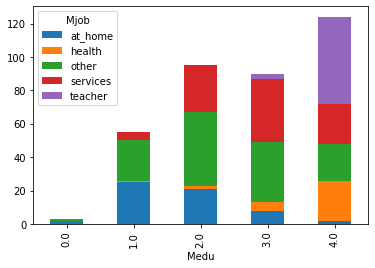

In [118]:
ct = pd.crosstab(stud['Medu'], stud['Mjob'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

#### Заполним модой по 'Medu'.

In [120]:
fill_null(stud, 'Mjob', 'Medu')

### Столбец 'address'

In [121]:
print("Уникальных значений:", stud['failures'].nunique())
print("Пропусков:", stud['failures'].isnull().sum())
print("Мода:", stud['failures'].mode()[0])
print("Медиана:", stud['failures'].median())
display(pd.DataFrame(stud['failures'].value_counts()))

Уникальных значений: 4
Пропусков: 22
Мода: 0.0
Медиана: 0.0


,failures
0.0,289
1.0,48
2.0,14
3.0,13


In [122]:
stud[stud.address.isnull()] \
    [['school', 'address', 'traveltime', 'internet', 'score']] \
    .sort_values('traveltime', ascending=False)

,school,address,traveltime,internet,score
52,GP,NaN,2.0,NaN,50.0
96,GP,NaN,2.0,yes,75.0
354,MS,NaN,2.0,yes,55.0
359,MS,NaN,2.0,yes,80.0
376,MS,NaN,2.0,yes,75.0
6,GP,NaN,1.0,yes,55.0
75,GP,NaN,1.0,yes,50.0
92,GP,NaN,1.0,no,30.0
159,GP,NaN,1.0,yes,60.0
168,GP,NaN,1.0,yes,0.0


Посмотрим на связь с признаком 'school' (школа).

In [123]:
stud[stud.address.isna()]['school'].value_counts()

GP    11
MS     4
Name: school, dtype: int64

address,R,U
school,,
GP,60,271
MS,23,17


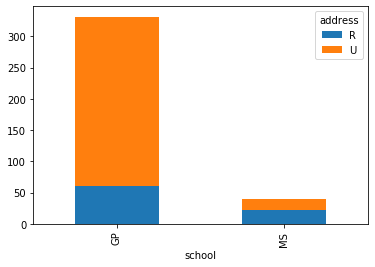

In [124]:
ct = pd.crosstab(stud['school'], stud['address'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

#### Заполним модой по 'school'.

In [125]:
fill_null(stud, 'address', 'school')

### Столбец 'failures'

In [126]:
print("Уникальных значений:", stud['failures'].nunique())
print("Пропусков:", stud['failures'].isnull().sum())
print("Мода:", stud['failures'].mode()[0])
print("Медиана:", stud['failures'].median())
display(pd.DataFrame(stud['failures'].value_counts()))

Уникальных значений: 4
Пропусков: 22
Мода: 0.0
Медиана: 0.0


,failures
0.0,289
1.0,48
2.0,14
3.0,13


In [127]:
stud[stud.failures.isnull()] \
    [['failures', 'famsup', 'activities', 'famrel', 'health', 'score']] \
    .sort_values('score', ascending=False)

,failures,famsup,activities,famrel,health,score
107,NaN,yes,yes,5.0,5.0,90.0
91,NaN,no,yes,4.0,1.0,90.0
171,NaN,yes,yes,4.0,3.0,80.0
115,NaN,yes,yes,5.0,5.0,80.0
21,NaN,yes,no,5.0,5.0,75.0
158,NaN,no,no,4.0,3.0,75.0
48,NaN,yes,no,4.0,5.0,70.0
108,NaN,yes,yes,1.0,1.0,65.0
54,NaN,no,NaN,5.0,1.0,65.0
236,NaN,no,yes,4.0,NaN,65.0


Посмотрим на связь с признаком 'score'.

In [128]:
stud[stud.failures.isnull()]['score'].value_counts()

65.0    4
40.0    3
50.0    2
55.0    2
0.0     2
80.0    2
90.0    2
75.0    2
60.0    1
45.0    1
70.0    1
Name: score, dtype: int64

failures,0.0,1.0,2.0,3.0
score,,,,
0.0,17,10,4,4
20.0,0,0,1,0
25.0,3,2,1,1
30.0,15,0,0,0
35.0,3,2,1,3
40.0,15,10,2,0
45.0,20,2,2,1
50.0,41,6,1,4
55.0,41,3,0,0


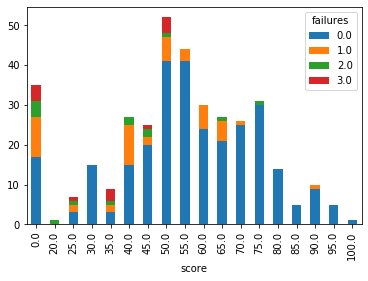

In [129]:
ct = pd.crosstab(stud['score'], stud['failures'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

В столбцах с результатом >65 практически не встречается значение неудач, отличное от 0.  
Для результатов <=65 другие значения также однозначно не преобладают.

#### Заполняем медианой (в данном случае она равна и моде).

In [130]:
stud.failures.fillna(stud.failures.median(), inplace=True)

### Столбец 'studytime'

In [131]:
print("Уникальных значений:", stud['studytime'].nunique())
print("Пропусков:", stud['studytime'].isnull().sum())
print("Мода:", stud['studytime'].mode()[0])
print("Медиана:", stud['studytime'].median())
display(pd.DataFrame(stud['studytime'].value_counts()))

Уникальных значений: 4
Пропусков: 7
Мода: 2.0
Медиана: 2.0


,studytime
2.0,187
1.0,102
3.0,63
4.0,27


In [132]:
stud[stud.studytime.isna()] \
    [['studytime', 'traveltime', 'freetime', 'goout', 'score']] \
    .sort_values('freetime', ascending = False)

,studytime,traveltime,freetime,goout,score
91,NaN,1.0,5.0,5.0,90.0
129,NaN,1.0,5.0,5.0,90.0
266,NaN,1.0,4.0,4.0,50.0
17,NaN,3.0,3.0,2.0,50.0
227,NaN,1.0,3.0,3.0,60.0
112,NaN,NaN,1.0,2.0,65.0
314,NaN,1.0,NaN,2.0,65.0


Посмотрим на связь с признаком 'freetime' (свободное время после школы).

In [133]:
stud[stud.studytime.isnull()]['freetime'].value_counts()

5.0    2
3.0    2
4.0    1
1.0    1
Name: freetime, dtype: int64

studytime,1.0,2.0,3.0,4.0
freetime,,,,
1.0,2,10,2,3
2.0,19,28,10,6
3.0,34,76,29,10
4.0,28,56,20,4
5.0,17,13,1,3


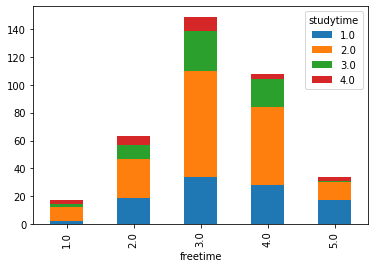

In [134]:
ct = pd.crosstab(stud['freetime'], stud['studytime'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

#### Заполним модой по 'freetime'.

In [135]:
fill_null(stud, 'studytime', 'freetime')

### Столбец 'goout'

In [136]:
print("Уникальных значений:", stud['goout'].nunique())
print("Пропусков:", stud['goout'].isnull().sum())
print("Мода:", stud['goout'].mode()[0])
print("Медиана:", stud['goout'].median())
display(pd.DataFrame(stud['goout'].value_counts()))

Уникальных значений: 5
Пропусков: 7
Мода: 3.0
Медиана: 3.0


,goout
3.0,126
2.0,101
4.0,80
5.0,50
1.0,22


In [137]:
stud[stud.goout.isna()] \
    [['goout', 'traveltime', 'freetime', 'studytime']] \
    .sort_values('freetime', ascending = False)

,goout,traveltime,freetime,studytime
202,NaN,1.0,4.0,2.0
92,NaN,1.0,3.0,2.0
200,NaN,1.0,3.0,2.0
221,NaN,1.0,3.0,3.0
241,NaN,NaN,3.0,2.0
322,NaN,1.0,3.0,3.0
89,NaN,1.0,1.0,2.0


Посмотрим на связь с признаком 'freetime' (свободное время после школы).

In [138]:
stud[stud.goout.isnull()]['freetime'].value_counts()

3.0    5
4.0    1
1.0    1
Name: freetime, dtype: int64

goout,1.0,2.0,3.0,4.0,5.0
freetime,,,,,
1.0,4,7,4,1,1
2.0,5,26,17,11,4
3.0,4,39,65,25,13
4.0,4,18,33,37,16
5.0,4,7,4,5,16


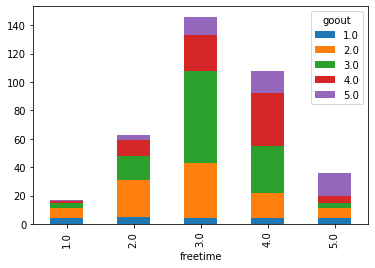

In [139]:
ct = pd.crosstab(stud['freetime'], stud['goout'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

#### Заполним модой по 'freetime'.

In [140]:
fill_null(stud, 'goout', 'freetime')

### Столбец 'schoolsup'

In [141]:
# get_column_info('schoolsup')
print("Уникальных значений:", stud['schoolsup'].nunique())
print("Пропусков:", stud['schoolsup'].isnull().sum())
print("Мода:", stud['schoolsup'].mode()[0])
display(pd.DataFrame(stud['schoolsup'].value_counts()))

Уникальных значений: 2
Пропусков: 9
Мода: no


,schoolsup
no,329
yes,48


In [142]:
stud[stud.schoolsup.isna()] \
    [['schoolsup','famsup','paid','activities','higher','freetime']]

,schoolsup,famsup,paid,activities,higher,freetime
27,NaN,no,yes,no,yes,2.0
35,NaN,yes,no,yes,yes,5.0
79,NaN,yes,no,no,yes,4.0
151,NaN,no,no,yes,yes,4.0
211,NaN,yes,yes,no,yes,3.0
274,NaN,yes,yes,no,yes,3.0
321,NaN,yes,no,no,yes,2.0
392,NaN,no,no,no,NaN,5.0
394,NaN,no,no,no,yes,2.0


#### Заполняем модой.

In [143]:
stud.schoolsup.fillna(stud['schoolsup'].mode()[0], inplace=True)

### Столбец 'higher'

In [144]:
# get_column_info('goout')
print("Уникальных значений:", stud['higher'].nunique())
print("Пропусков:", stud['higher'].isnull().sum())
print("Мода:", stud['higher'].mode()[0])
# print("Медиана:",stud['higher'].median())
display(pd.DataFrame(stud['higher'].value_counts()))

Уникальных значений: 2
Пропусков: 20
Мода: yes


,higher
yes,348
no,18


In [145]:
stud[stud.higher.isna()] \
    [['higher','studytime','score']] \
    .sort_values('score', ascending = False)

,higher,studytime,score
171,NaN,2.0,80.0
34,NaN,1.0,75.0
96,NaN,1.0,75.0
158,NaN,1.0,75.0
331,NaN,3.0,70.0
48,NaN,2.0,70.0
320,NaN,2.0,65.0
227,NaN,2.0,60.0
181,NaN,2.0,60.0
142,NaN,3.0,55.0


Посмотрим на связь с признаком 'score'.

In [146]:
stud[stud.higher.isnull()]['score'].value_counts()

50.0    6
75.0    3
60.0    2
70.0    2
35.0    1
45.0    1
65.0    1
40.0    1
80.0    1
0.0     1
55.0    1
Name: score, dtype: int64

higher,no,yes
score,,
0.0,6,30
20.0,0,1
25.0,0,7
30.0,0,15
35.0,1,7
40.0,2,27
45.0,2,23
50.0,3,45
55.0,0,45


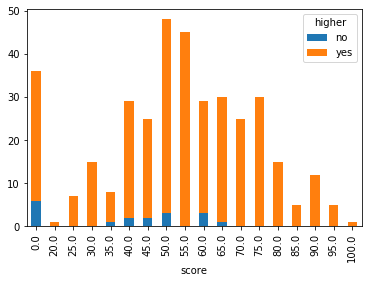

In [147]:
ct = pd.crosstab(stud['score'], stud['higher'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

#### Заполняем модой.

In [148]:
stud.higher.fillna(stud['higher'].mode()[0], inplace=True)

### Столбец 'romantic'

In [149]:
# get_column_info('goout')
print("Уникальных значений:", stud['romantic'].nunique())
print("Пропусков:", stud['romantic'].isnull().sum())
print("Мода:", stud['romantic'].mode()[0])
# print("Медиана:",stud['higher'].median())
display(pd.DataFrame(stud['romantic'].value_counts()))

Уникальных значений: 2
Пропусков: 31
Мода: no


,romantic
no,233
yes,122


In [150]:
stud[stud.romantic.isna()] \
    [['romantic','sex','age','goout']] \
    .sort_values('age', ascending = False)

,romantic,sex,age,goout
308,NaN,M,19,3.0
380,NaN,M,18,4.0
342,NaN,M,18,3.0
330,NaN,M,18,5.0
290,NaN,M,18,2.0
261,NaN,M,18,2.0
239,NaN,M,18,4.0
373,NaN,F,17,5.0
372,NaN,F,17,3.0
339,NaN,F,17,3.0


Посмотрим на связь с признаком 'sex' (пол).

In [151]:
stud[stud.romantic.isnull()]['sex'].value_counts()

M    18
F    13
Name: sex, dtype: int64

romantic,no,yes
sex,,
F,113,77
M,120,45


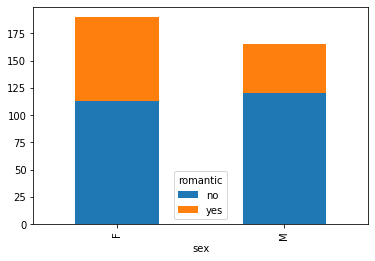

In [152]:
ct = pd.crosstab(stud['sex'], stud['romantic'])
display(ct)

ct.plot.bar(stacked=True)
plt.show()

#### Заполняем модой.

In [153]:
stud.romantic.fillna(stud['romantic'].mode()[0], inplace=True)

Все пропуски заполнены. Создаем третий вариант датафрейма.

In [154]:
stud_result_3 = stud.drop(cols_to_drop,axis=1)
stud_result_3.isnull().any().sum()

0

In [155]:
stud_result_3.info()
stud_result_3.describe(include = 'all').T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 13 columns):
sex          386 non-null object
age          386 non-null int64
address      386 non-null object
Medu         386 non-null float64
Fedu         386 non-null float64
Mjob         386 non-null object
studytime    386 non-null float64
failures     386 non-null float64
schoolsup    386 non-null object
higher       386 non-null object
romantic     386 non-null object
goout        386 non-null float64
score        386 non-null float64
dtypes: float64(6), int64(1), object(6)
memory usage: 52.2+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sex,386,2,F,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,386,NaN,NaN,NaN,16.6528,1.22896,15,16,17,18,21
address,386,2,U,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,386,NaN,NaN,NaN,2.76425,1.09728,0,2,3,4,4
Fedu,386,NaN,NaN,NaN,2.56218,1.09189,0,2,3,4,4
Mjob,386,5,other,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,386,NaN,NaN,NaN,2.03368,0.844481,1,1,2,2,4
failures,386,NaN,NaN,NaN,0.297927,0.696444,0,0,0,0,3
schoolsup,386,2,no,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
higher,386,2,yes,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[К содержанию](#0)

In [156]:
print(*cols_to_keep)

Fedu Medu Mjob address failures goout higher romantic schoolsup sex studytime


<a id='9'></a>
# 9. Итоги

1. В целом данные чистые: кол-во пропусков в столбцах небольшое, выбросов мало. Проблему составляет то, что пропуски неравномерно распределены по столбцам.
2. Всего 3 столбца заполнены непрерывными числовыми данными, один из которых – столбец с целевой переменной.
3. Значительная часть столбцов содержит номинативные признаки. Для создания модели потребуется использовать dummy-кодирование или какой-то другой вид кодирования.
4. Из 30 столбцов были удалены 17 ('studytime granular' имел полную обратную корреляцию со столбцом 'studytime', столбец 'absences' после очистки от выбросов показал низкую корреляцию с целевой переменной, для 15 столбцов с номинативными признаками не были найдены статистически значимые различия).
5. Следующие признаки были сочтены значимыми: 'Fedu', 'Medu', 'Mjob', 'address', 'failures', 'goout', 'higher', 'romantic', 'schoolsup', 'sex', 'studytime'.
6. Создано 3 варианта датафреймов без пропусков, которые далее можно использовать для построения модели:
    1. __stud_result_1__. Содержит 261 строку. В нём просто удалены все строки с пропусками.
    2. __stud_result_2__. Содержит 386 строк. В нём пропуски заполнены модой по столбцу.
    3. __stud_result_3__. Содержит 386 строк. В нём пропуски заполнены в зависимости от значений связанных признаков.

[К содержанию](#0)